In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/intermittent-renewables-production-france.csv')
df

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


In [ ]:
df.drop('dayName', axis = 1, inplace = True)
df.drop('StartHour', axis = 1, inplace = True)
df.drop('EndHour', axis = 1, inplace = True)
df.drop('Date and Hour', axis = 1, inplace = True)
df.drop('Source', axis = 1, inplace = True)
df.drop('monthName', axis = 1, inplace = True)
df.drop('dayOfYear', axis = 1, inplace = True)

In [ ]:
df

,Date,Production
0,2020-07-22,244.0
1,2020-07-23,223.0
2,2020-07-23,2517.0
3,2020-07-23,658.0
4,2020-07-23,0.0
...,...,...
59801,2023-06-30,55.0
59802,2023-06-30,4554.0
59803,2023-06-30,4589.0
59804,2023-06-30,4173.0


In [ ]:
df = df.dropna()

In [ ]:
df.Date = pd.to_datetime(df.Date)

<ipython-input-10-768506901f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date = pd.to_datetime(df.Date)


In [ ]:
df.dtypes

Date          datetime64[ns]
Production           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59804 entries, 0 to 59805
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        59804 non-null  datetime64[ns]
 1   Production  59804 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [ ]:
df.index = df.Date

In [ ]:
df

,Date,Production
Date,,
2020-07-22,2020-07-22,244.0
2020-07-23,2020-07-23,223.0
2020-07-23,2020-07-23,2517.0
2020-07-23,2020-07-23,658.0
2020-07-23,2020-07-23,0.0
...,...,...
2023-06-30,2023-06-30,55.0
2023-06-30,2023-06-30,4554.0
2023-06-30,2023-06-30,4589.0


In [ ]:
df.isnull().sum()

Date          0
Production    0
dtype: int64

In [ ]:
df = df.resample('D').mean()

<ipython-input-16-b2a71f0fdeef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').mean()


In [ ]:
from scipy import stats
import statsmodels.api as sm

In [ ]:
df

,Production
Date,
2020-01-01,984.437500
2020-01-02,1859.104167
2020-01-03,3738.020833
2020-01-04,1763.395833
2020-01-05,1028.291667
...,...
2023-06-26,3227.562500
2023-06-27,2212.041667
2023-06-28,1872.583333


In [ ]:
#drop March rows
df.loc['01-03-2020':'31-03-2020']

<ipython-input-19-73d9de5d4d52>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.loc['01-03-2020':'31-03-2020']


,Production
Date,
2020-01-03,3738.020833
2020-01-04,1763.395833
2020-01-05,1028.291667
2020-01-06,2256.979167
2020-01-07,2161.333333
...,...
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,NaN


In [ ]:
df = df.interpolate(method='linear', axis=1).ffill().bfill()

In [ ]:
df.loc['01-03-2020':'31-03-2020']

<ipython-input-21-c1e5d0510910>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.loc['01-03-2020':'31-03-2020']


,Production
Date,
2020-01-03,3738.020833
2020-01-04,1763.395833
2020-01-05,1028.291667
2020-01-06,2256.979167
2020-01-07,2161.333333
...,...
2020-03-27,6260.083333
2020-03-28,6260.083333
2020-03-29,6260.083333


In [ ]:
df['Production_new'], lmbda = stats.boxcox(df.Production)

In [ ]:
df

,Production,Production_new
Date,,
2020-01-01,984.437500,7.391641
2020-01-02,1859.104167,8.126443
2020-01-03,3738.020833,8.944576
2020-01-04,1763.395833,8.065000
2020-01-05,1028.291667,7.441714
...,...,...
2023-06-26,3227.562500,8.771636
2023-06-27,2212.041667,8.328975
2023-06-28,1872.583333,8.134847


In [ ]:
df.Production_new.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Production_new.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -7.574416721676096
p-value: 2.7860415139402282e-11
Critical Values: {'1%': -3.4355217427788793, '5%': -2.8638238726872296, '10%': -2.5679859566283705}


In [ ]:
import statsmodels

model=statsmodels.tsa.arima.model.ARIMA(df.Production_new,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Production_new   No. Observations:                 1277
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -805.045
Date:                Wed, 09 Aug 2023   AIC                           1616.090
Time:                        09:50:03   BIC                           1631.545
Sample:                    01-01-2020   HQIC                          1621.894
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6592      0.023     28.219      0.000       0.613       0.705
ma.L1         -0.9790      0.007   -141.709      0.000      -0.993      -0.965
sigma2         0.2065      0.008     24.825      0.000       0.190       0.223
===================================================================================
Ljung-Box (L1) (Q):                   6.73   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.01   Prob(JB):                         0.68
Heteroskedasticity (H):               0.81   Skew:                             0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [ ]:
df_new = model_fit.predict(start=0,end=100)
df_new

Date
2020-01-01    0.000000
2020-01-02    7.391640
2020-01-03    8.001644
2020-01-04    8.678937
2020-01-05    8.020529
                ...   
2020-04-06    8.989132
2020-04-07    8.731247
2020-04-08    8.263946
2020-04-09    8.084251
2020-04-10    8.165856
Freq: D, Name: predicted_mean, Length: 101, dtype: float64

In [ ]:
from datetime import datetime

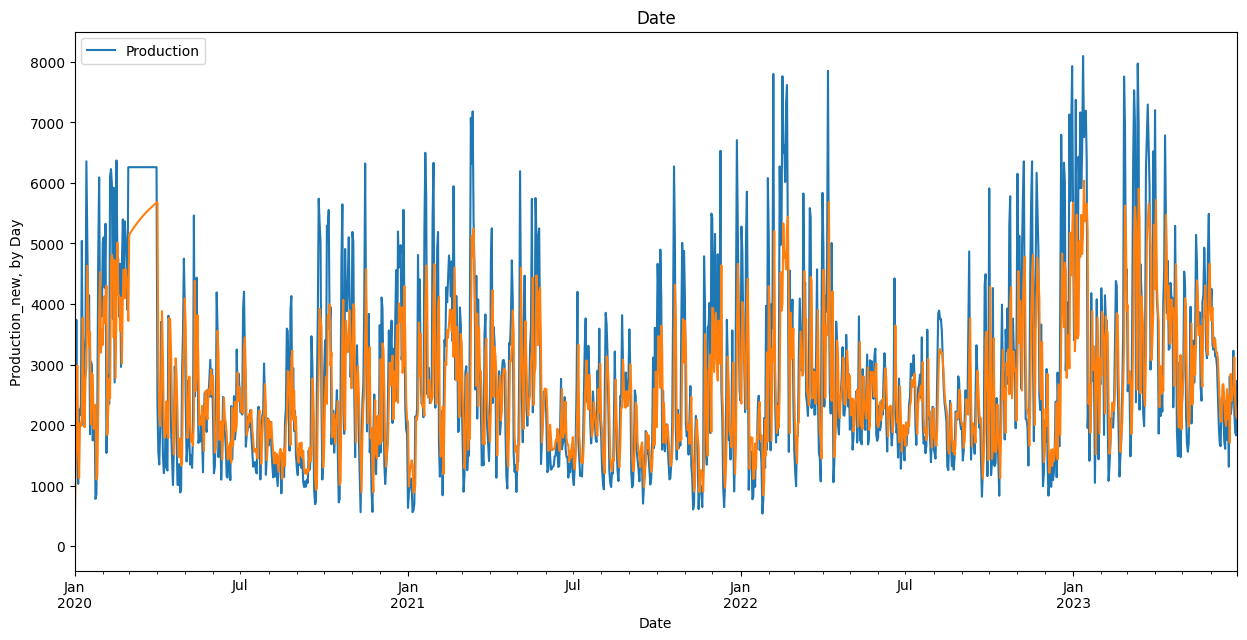

In [ ]:
df2 = df[['Production']]

df2['Production2'] = invboxcox(model_fit.predict(start=df2.index[0],end=df2.index[-1]), lmbda)
plt.figure(figsize=(15,7))
df2.Production.plot()
plt.plot(df2.index, df2["Production2"])
plt.legend()
plt.title('Date')
plt.ylabel('Production_new, by Day')
plt.show()

In [ ]:
df.Production_new = df.Production_new.dropna()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Production        0
Production_new    0
dtype: int64

In [ ]:
def convert_to_matrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)[: , -1]

features, targets = convert_to_matrix(df.Production_new.values[:, np.newaxis], 2)

In [ ]:
df.Production_new = df.Production_new.dropna()

In [ ]:
features.shape

(1275, 2, 1)

In [ ]:
targets.shape

(1275,)

In [ ]:
targets

array([8.94457565, 8.06499995, 7.44171373, ..., 8.13484666, 8.10711326,
       8.57350979])

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential([
    LSTM(50),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
model.fit(features, targets, batch_size=1, epochs=50)

Epoch 1/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2284
Epoch 2/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2219
Epoch 3/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2244
Epoch 4/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2188
Epoch 5/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2286
Epoch 6/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2222
Epoch 7/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2228
Epoch 8/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2270
Epoch 9/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2266
Epoch 10/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2233
Epoch 11/50
1275/1275 [==============================] - 4s 3ms/step - loss: 0.2231
Epoch 12/50
1275/1275 [==============================] - 5s 4ms/step - loss: 0.2234
E